In [77]:
# Nome: Lucas Galvão Janot
# RA: 22251259

### Importação de bibliotecas

In [78]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

from sklearn.metrics import classification_report

### Transformação e Pré-processamento dos dados

In [79]:
# Carregar os dados
df = pd.read_csv('train_futebol.csv')

# Transformação de variáveis categóricas
le = LabelEncoder()
df['Home'] = le.fit_transform(df['Home'])
df['Away'] = le.fit_transform(df['Away'])
df['WIN'] = df['WIN'].map({'Home': 1, 'Away': 2, 'Draw': 0})

# Selecionar as features e o target
features = df[['Home', 'Away', 'Yellow_Away', 'Yellow_Home', 'Goal_Away', 'Goal_Home', 'Red_Card_Away', 'Red_Card_Home']]
target = df['WIN']

# Dividir os dados em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

         Home      Away  Round        Date   Time   WIN  minuto       evento  \
0  Birmingham  West Ham     38  11.05.2003  16:00  Draw      27  Yellow_Away   
1  Birmingham  West Ham     38  11.05.2003  16:00  Draw      57  Yellow_Home   
2  Birmingham  West Ham     38  11.05.2003  16:00  Draw      66    Goal_Away   
3  Birmingham  West Ham     38  11.05.2003  16:00  Draw      80    Goal_Home   
4  Birmingham  West Ham     38  11.05.2003  16:00  Draw      88    Goal_Home   

   Yellow_Away  Yellow_Home  Goal_Away  Goal_Home  Red_Card_Away  \
0            1            0          0          0              0   
1            1            1          0          0              0   
2            1            1          1          0              0   
3            1            1          1          1              0   
4            1            1          1          2              0   

   Red_Card_Home  Own_Home  Own_Away  Penalty_Missed_Home  \
0              0         0         0             

### Definição e Treino do Modelo

In [80]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Acurácia: 0.93
AUC: 0.99


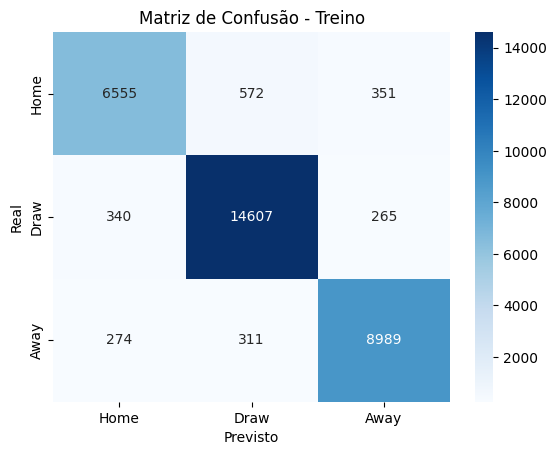

              precision    recall  f1-score   support

        Draw       0.91      0.88      0.90      7478
        Home       0.94      0.96      0.95     15212
        Away       0.94      0.94      0.94      9574

    accuracy                           0.93     32264
   macro avg       0.93      0.93      0.93     32264
weighted avg       0.93      0.93      0.93     32264



In [81]:
predictions = model.predict(X_train)

# Cálculo de métricas
accuracy = accuracy_score(y_train, predictions)
confusion = confusion_matrix(y_train, predictions)
roc_auc = roc_auc_score(y_train, model.predict_proba(X_train), multi_class='ovr')

print(f'Acurácia: {accuracy:.2f}')
print(f'AUC: {roc_auc:.2f}')

# Matriz de Confusão
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=['Home', 'Draw', 'Away'], yticklabels=['Home', 'Draw', 'Away'])
plt.ylabel('Real')
plt.xlabel('Previsto')
plt.title('Matriz de Confusão - Treino')
plt.show()

# Gerar o relatório de classificação
report = classification_report(y_train, predictions, target_names=['Draw', 'Home', 'Away'])
print(report)

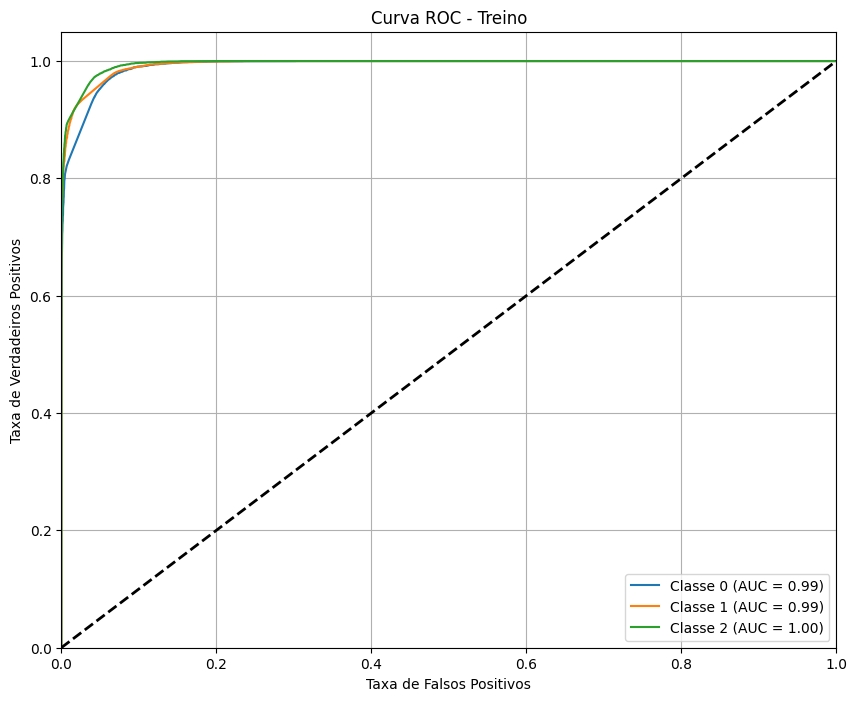

In [82]:

# Calcular as probabilidades de previsão
y_prob = model.predict_proba(X_train)

# Calcular a curva ROC para cada classe
fpr = {}
tpr = {}
roc_auc = {}

# Considerando a classificação binária e convertendo o problema multi-classe
for i in range(3):  # 0: Draw, 1: Home, 2: Away
    fpr[i], tpr[i], _ = roc_curve(y_train == i, y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plotar as curvas ROC
plt.figure(figsize=(10, 8))
for i in range(3):
    plt.plot(fpr[i], tpr[i], label=f'Classe {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Linha diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC - Treino')
plt.legend(loc='lower right')
plt.grid()
plt.show()

Acurácia: 0.71
AUC: 0.86


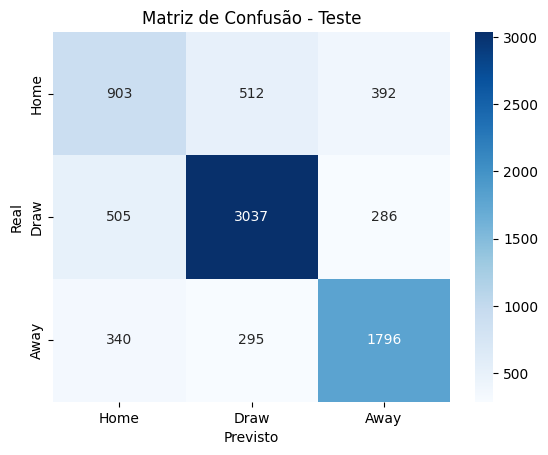

              precision    recall  f1-score   support

        Draw       0.52      0.50      0.51      1807
        Home       0.79      0.79      0.79      3828
        Away       0.73      0.74      0.73      2431

    accuracy                           0.71      8066
   macro avg       0.68      0.68      0.68      8066
weighted avg       0.71      0.71      0.71      8066



In [83]:
predictions = model.predict(X_test)

# Cálculo de métricas
accuracy = accuracy_score(y_test, predictions)
confusion = confusion_matrix(y_test, predictions)
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr')

print(f'Acurácia: {accuracy:.2f}')
print(f'AUC: {roc_auc:.2f}')

# Matriz de Confusão
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=['Home', 'Draw', 'Away'], yticklabels=['Home', 'Draw', 'Away'])
plt.ylabel('Real')
plt.xlabel('Previsto')
plt.title('Matriz de Confusão - Teste')
plt.show()

# Gerar o relatório de classificação
report = classification_report(y_test, predictions, target_names=['Draw', 'Home', 'Away'])
print(report)

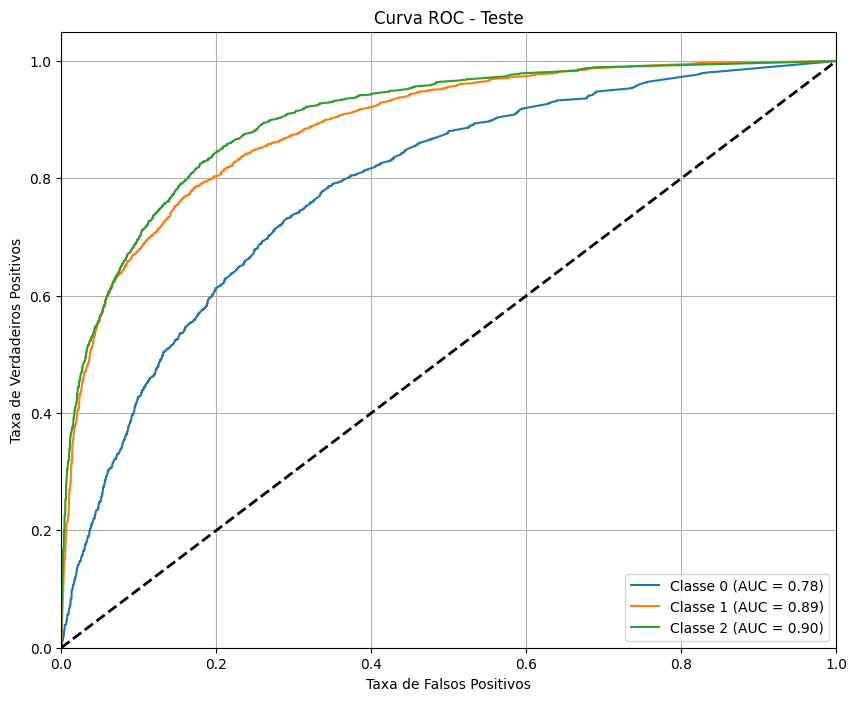

In [84]:
# Calcular as probabilidades de previsão
y_prob = model.predict_proba(X_test)

# Calcular a curva ROC para cada classe
fpr = {}
tpr = {}
roc_auc = {}

# Considerando a classificação binária e convertendo o problema multi-classe
for i in range(3):  # 0: Draw, 1: Home, 2: Away
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plotar as curvas ROC
plt.figure(figsize=(10, 8))
for i in range(3):
    plt.plot(fpr[i], tpr[i], label=f'Classe {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Linha diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC - Teste')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [85]:
# # Previsões no conjunto de teste
# test_predictions = model.predict(X_test)

# # Submissão para Kaggle (se necessário)
# submission = pd.DataFrame({
#     'Id': X_test.index,
#     'WIN': ['Home' if pred == 1 else 'Away' if pred == 2 else 'Draw' for pred in test_predictions]
# })
# submission.to_csv('submission.csv', index=False)

### Otimização

In [86]:
# Importando bibliotecas necessárias
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score


# Definir o modelo
rf = RandomForestClassifier(random_state=42)

# Definir os hiperparâmetros a serem otimizados
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
    'max_features': ['sqrt']
}

# Definir o GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=3, n_jobs=-1, verbose=2)

# Treinar o modelo e realizar a busca
grid_search.fit(X_train, y_train)

# Exibir os melhores hiperparâmetros encontrados
print("Melhores parâmetros: ", grid_search.best_params_)

# Fazer previsões no conjunto de teste
y_pred = grid_search.predict(X_test)

# Avaliar o modelo
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia no teste: ", accuracy)

Fitting 3 folds for each of 162 candidates, totalling 486 fits
Melhores parâmetros:  {'bootstrap': False, 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
Acurácia no teste:  0.7313414331762955


### Modelo Otimizado

In [87]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=8, min_samples_leaf=3, max_features='sqrt', max_depth=20, bootstrap=False)
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, max_depth=20, min_samples_leaf=3,
                       min_samples_split=8, n_estimators=200)

Acurácia: 0.73
AUC: 0.88


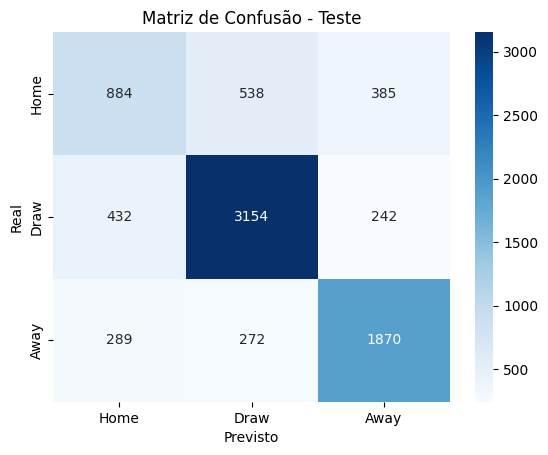

              precision    recall  f1-score   support

        Draw       0.55      0.49      0.52      1807
        Home       0.80      0.82      0.81      3828
        Away       0.75      0.77      0.76      2431

    accuracy                           0.73      8066
   macro avg       0.70      0.69      0.70      8066
weighted avg       0.73      0.73      0.73      8066



In [88]:
predictions = model.predict(X_test)

# Cálculo de métricas
accuracy = accuracy_score(y_test, predictions)
confusion = confusion_matrix(y_test, predictions)
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr')

print(f'Acurácia: {accuracy:.2f}')
print(f'AUC: {roc_auc:.2f}')

# Matriz de Confusão
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=['Home', 'Draw', 'Away'], yticklabels=['Home', 'Draw', 'Away'])
plt.ylabel('Real')
plt.xlabel('Previsto')
plt.title('Matriz de Confusão - Teste')
plt.show()

# Gerar o relatório de classificação
report = classification_report(y_test, predictions, target_names=['Draw', 'Home', 'Away'])
print(report)

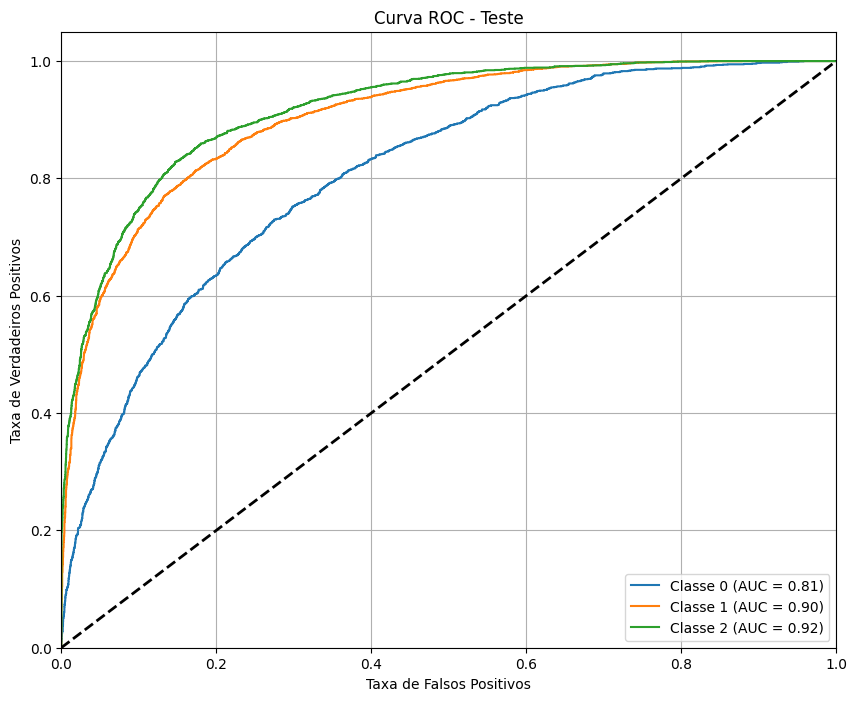

In [89]:
# Calcular as probabilidades de previsão
y_prob = model.predict_proba(X_test)

# Calcular a curva ROC para cada classe
fpr = {}
tpr = {}
roc_auc = {}

# Considerando a classificação binária e convertendo o problema multi-classe
for i in range(3):  # 0: Draw, 1: Home, 2: Away
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plotar as curvas ROC
plt.figure(figsize=(10, 8))
for i in range(3):
    plt.plot(fpr[i], tpr[i], label=f'Classe {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Linha diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC - Teste')
plt.legend(loc='lower right')
plt.grid()
plt.show()